<a href="https://colab.research.google.com/github/JP-Barbaresco/aula-ferramentas-computacionais/blob/main/cancer_de_mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image, ImageDraw, ImageEnhance
from skimage import measure
import numpy as np
import cv2

# Abrir imagem
imagem = Image.open('/content/breast_cancer.png')

# Converter a imagem em escala de cinza
imagem_cinza = imagem.convert('L')

# Converter a imagem em uma matriz numpy
matriz_imagem = np.array(imagem_cinza)

# Detectar os contornos
contornos = measure.find_contours(matriz_imagem, 0.8)

# Desenhar os contornos na imagem original
desenhar = ImageDraw.Draw(imagem)
for contorno in contornos:
    for i in range(len(contorno) - 1):
        desenhar.line((contorno[i][1], contorno[i][0], contorno[i+1][1], contorno[i+1][0]), fill='red', width=2)

# Aumentar o contraste
realcar = ImageEnhance.Contrast(imagem)
imagem_realce = realcar.enhance(3.5)

# Mostrar a imagem com os contornos
imagem_realce.save('/content/mama_contornos.png')
imagem_realce.show()

In [ ]:
import cv2
import numpy as np
img = cv2.imread('/content/mama_contornos.png')

numero_pixels_braco = np.sum(img == 255)
numero_pixels_preto = np.sum(img == 0)

print(f"Número de pixels brancos: {numero_pixels_braco}")
print(f"Número de pixels pretos: {numero_pixels_preto}")

percentual_pixels_brancos = (numero_pixels_braco / (numero_pixels_braco + numero_pixels_preto)) * 100

print('Percentual pixels brancos:', percentual_pixels_brancos)

if (percentual_pixels_brancos >= 30):
  print('Mama com câncer')
else:
  print('Mama sem câncer')

Número de pixels brancos: 322639
Número de pixels pretos: 642620
Percentual pixels brancos: 33.425122169283064
Mama com câncer


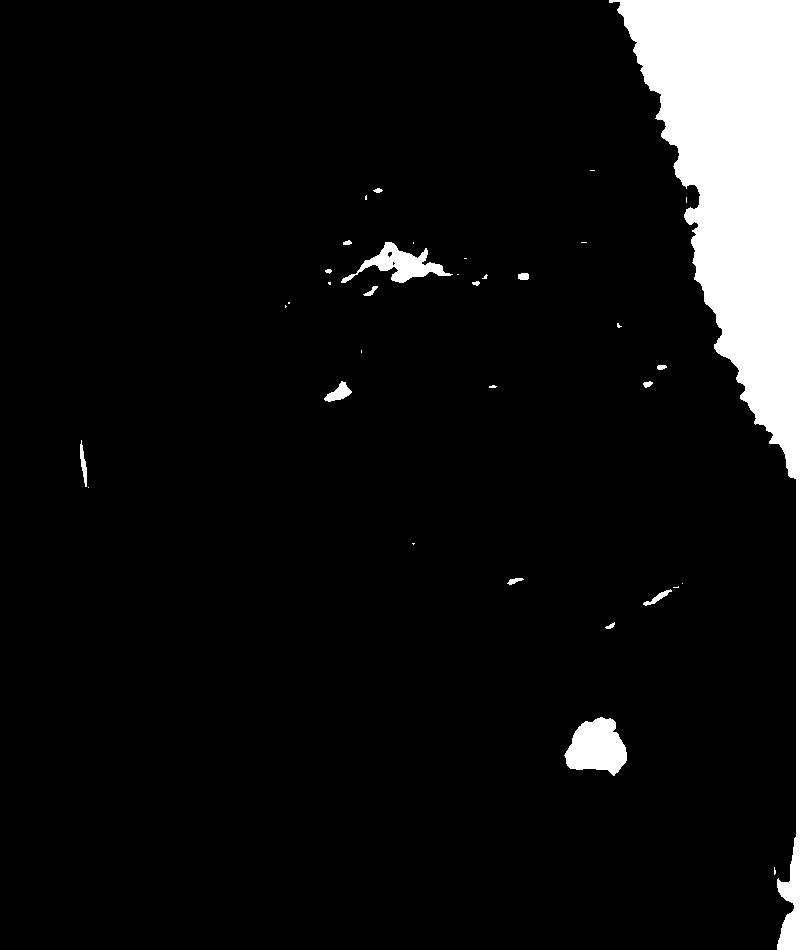

In [21]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

img = cv2.imread('/content/breast_cancer.png')

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, thresh_image = cv2.threshold(gray_image, 165, 255, cv2.THRESH_BINARY)

cv2_imshow(thresh_image)